## Titanic Analysis

### Importing Modules

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Data

In [4]:

df = pd.read_csv("C:/Users/Lenovo/Desktop/Project/Titanic Analysis/train.csv")

In [5]:
len(df)

891

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [54]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeBin         177
dtype: int64

#### Age,Cabin,Embarked have missing data

In [48]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeBin       714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.9+ KB


In [57]:
df.shape

(891, 13)

In [16]:
#Gender Distribution
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### This is kind of interesting but maybe this kind of observations can benefit from displaying the data in a graphical form as this is a brief introduction to the analysis.

<Axes: xlabel='SibSp', ylabel='count'>

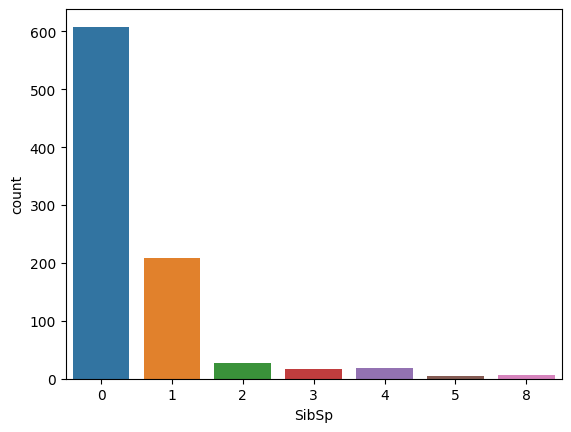

In [59]:
sns.countplot(x='SibSp',data=df)


<Axes: xlabel='Pclass', ylabel='Age'>

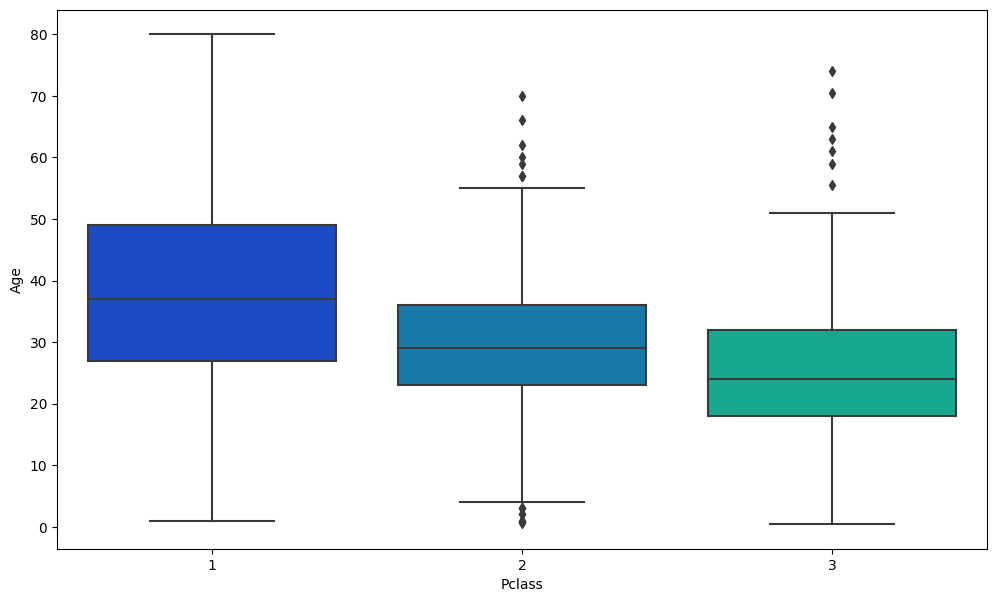

In [60]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [61]:
print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


##### We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.



## Data Visualization/Exploratory Data Analysis

### Columns we'll analyze:
 1. Age
 2. Pclass
 3. Sex

### 1.Age

<Axes: >

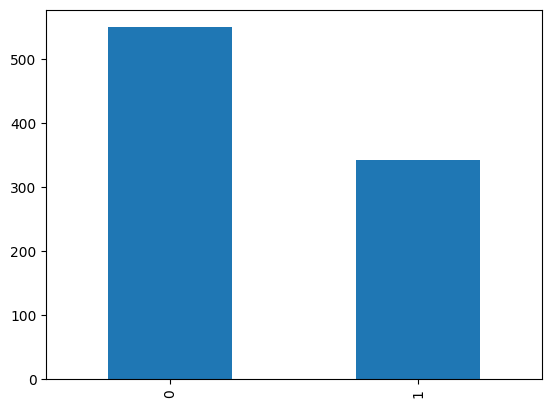

In [18]:
alpha_color = 0.5
df['Survived'].value_counts().plot(kind='bar')

<Axes: >

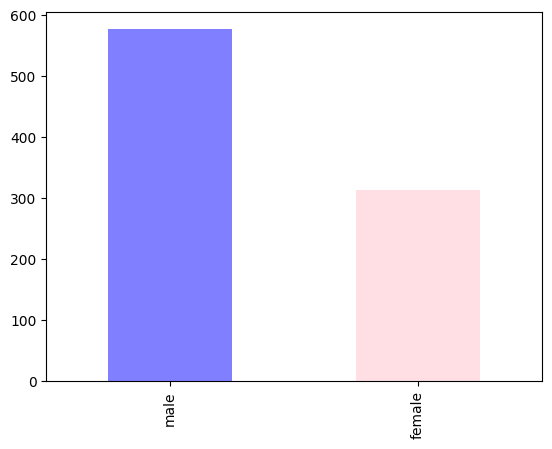

In [22]:
df['Sex'].value_counts().plot(kind='bar',color =['b','pink'],alpha = alpha_color)

<Axes: >

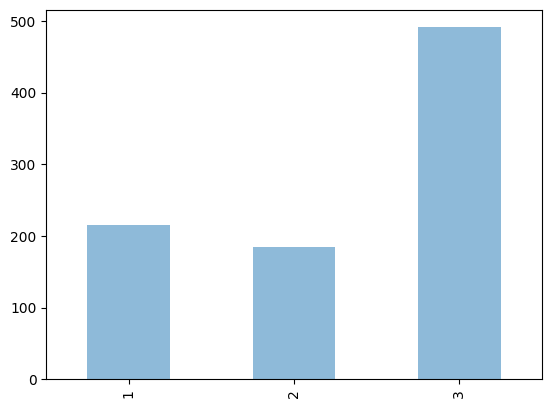

In [23]:
df['Pclass'].value_counts().sort_index().plot(kind='bar',alpha = alpha_color)

<Axes: xlabel='Survived', ylabel='Age'>

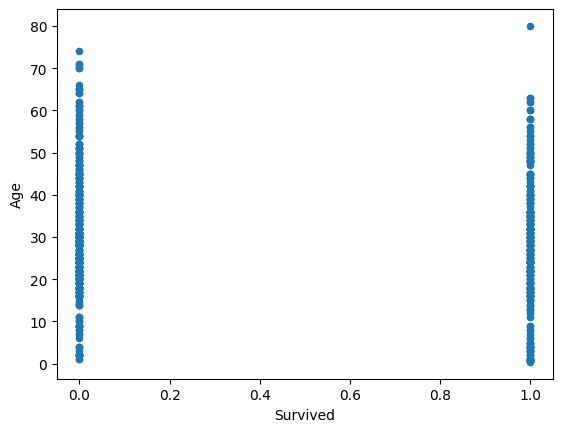

In [25]:
df.plot(kind='scatter',x='Survived',y='Age')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3380\2657660848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

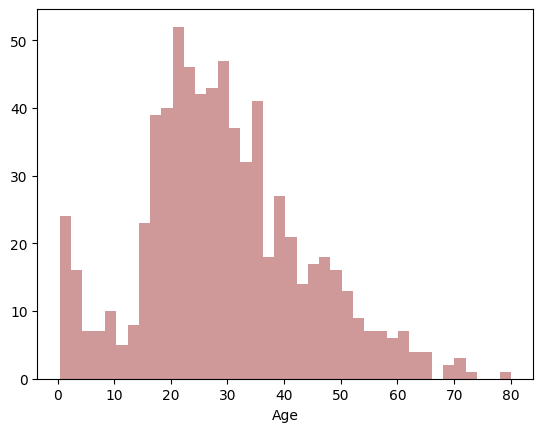

In [56]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: >

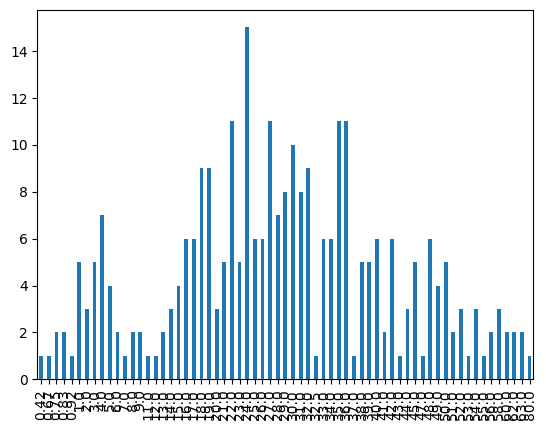

In [26]:
df[df['Survived']==1]['Age'].value_counts().sort_index().plot(kind='bar')

#### The data here is quite difficult to read and understand as the number of columns and rows is huge.
#### To solve this problem binning method is being used.

In [31]:
bins = [0,10,20,30,40,50,60,70,80]
df['AgeBin'] = pd.cut(df['Age'],bins)

<Axes: >

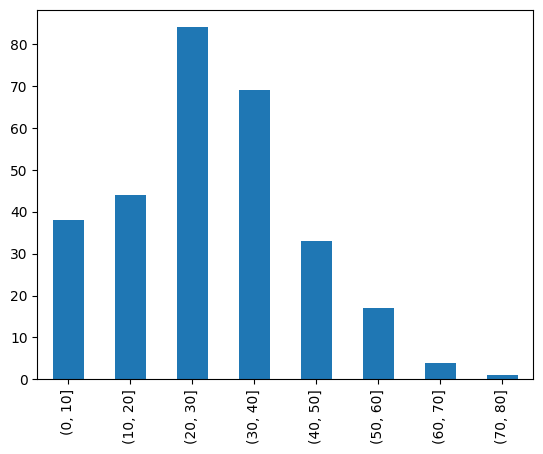

In [35]:
#Survived
df[df['Survived']==1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

<Axes: >

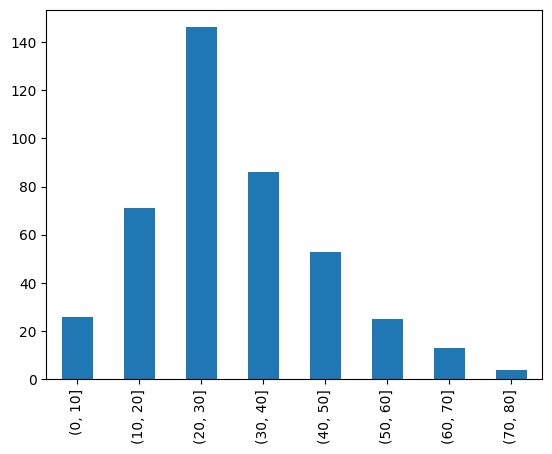

In [36]:
#Not Survived
df[df['Survived']==0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

<Axes: >

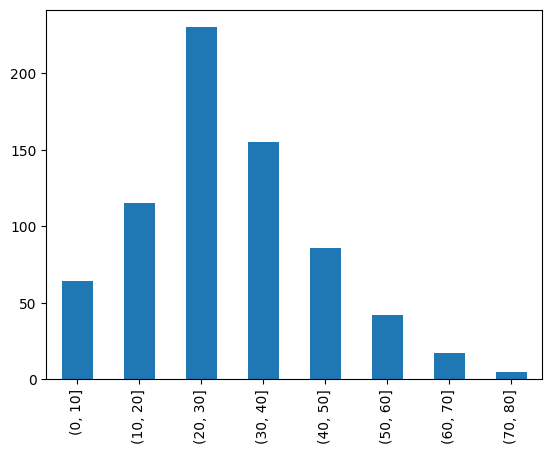

In [37]:
df['AgeBin'].value_counts().sort_index().plot(kind='bar')

#### The graphs are quite similar so according to the analysis, Age does not tell us much about the survival of the passengers

### 2. Pclass

<Axes: >

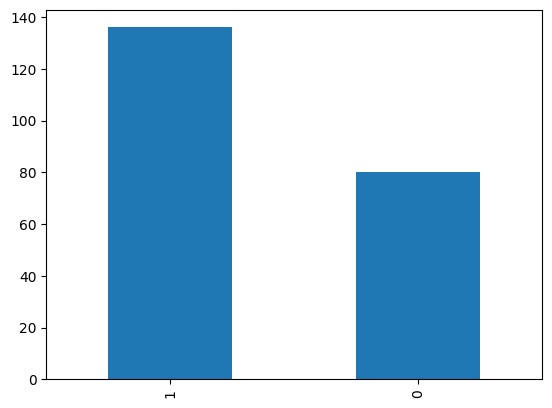

In [38]:
df[df['Pclass']==1]['Survived'].value_counts().plot(kind='bar')

<Axes: >

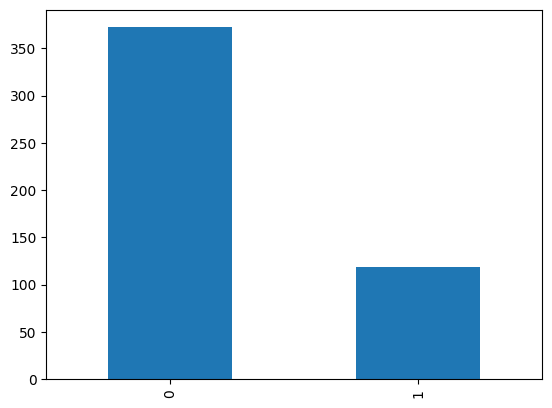

In [39]:
df[df['Pclass']==3]['Survived'].value_counts().plot(kind='bar')

#### The cross-reference between 'First Class' people and 'Third Class' people is quits opposite.The survival rate is 60:40 in both the cases.The majority of the passengers in the 'Third Class' did not survive.

### 3. Sex/Gender

<Axes: >

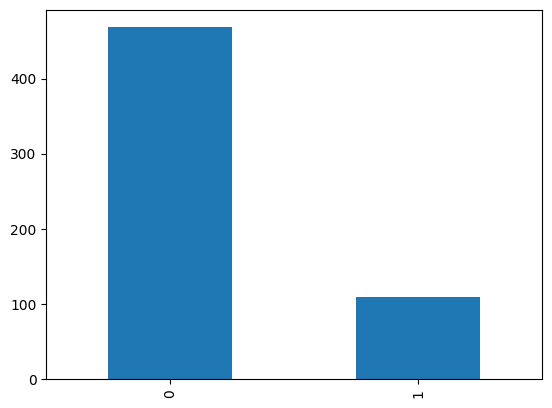

In [41]:
df[df['Sex']== 'male']['Survived'].value_counts().plot(kind='bar')

#### The majority of the male passengers did not survive

<Axes: >

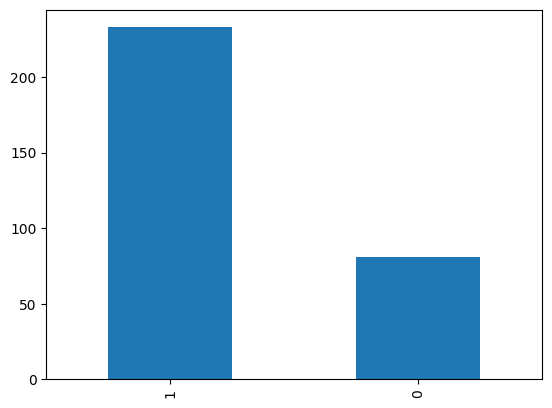

In [42]:
df[df['Sex']== 'female']['Survived'].value_counts().plot(kind='bar')

#### The majority of the female passengers survived

<Axes: >

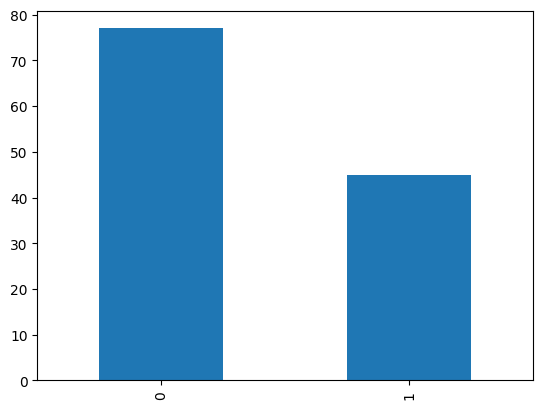

In [43]:
# Cross-reference between Gender and Class
df[(df['Sex']== 'male') & (df['Pclass']== 1)]['Survived'].value_counts().plot(kind='bar')

<Axes: >

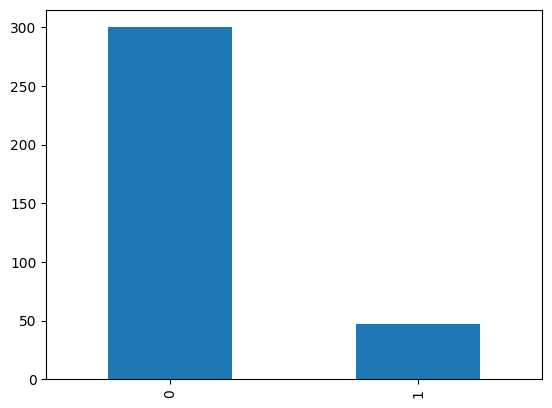

In [44]:
df[(df['Sex']== 'male') & (df['Pclass']== 3)]['Survived'].value_counts().plot(kind='bar')

<Axes: >

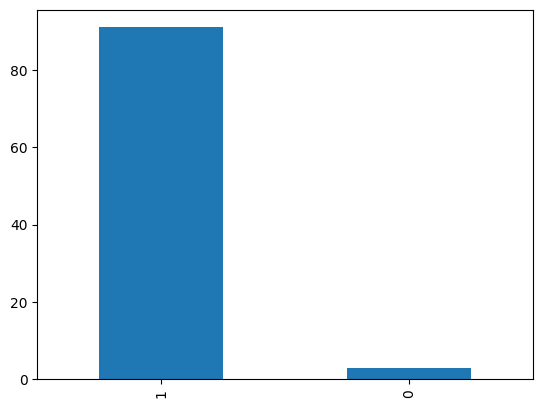

In [45]:
df[(df['Sex']== 'female') & (df['Pclass']== 1)]['Survived'].value_counts().plot(kind='bar')

<Axes: >

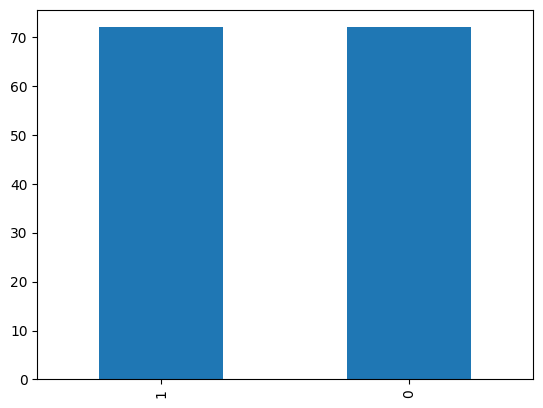

In [47]:
df[(df['Sex']== 'female') & (df['Pclass']== 3)]['Survived'].value_counts().plot(kind='bar')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3380\2958808694.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu")


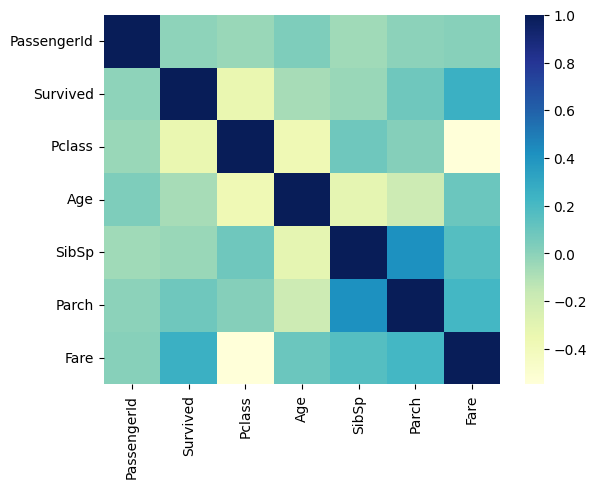

In [52]:
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

#### Conclusion

- For all practical purposes age can be cosidered as normal distribution
- Deeper analysis is required for outlier detection
- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadliest
- Somehow, people going to C survived more
- People in the age range of 20 to 40 had a higher chance of not surviving
- People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone
